In [1]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
def load_data(filename):
    """ Load dataset from filename
    Args:
        filename (string): Path to data
        
    Returns:
        df (DataFrame): Dataset from file
    """
    
    df = pd.read_csv(filename)
    return df

In [3]:
path_to_dataset = "./data/proyect_2_dataset.csv"
data = load_data(path_to_dataset)
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,139757.000000,139976.000000,138032.000000,80180.000000,73346.000000,131248.000000,139484.000000,138221.000000,138616.000000,136794.000000,126569.000000,126600.000000,86911.000000,83503.000000,139482.000000,137674.000000
mean,12.198725,23.222497,2.360488,5.466366,7.608249,40.029814,14.035832,18.655978,68.886247,51.549439,1017.649744,1015.255033,4.448919,4.511670,16.994266,21.683567
std,6.397990,7.121939,8.485090,4.194826,3.786612,13.598773,8.910200,8.805227,19.024595,20.796737,7.101834,7.032827,2.886817,2.719796,6.489244,6.938779
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141194 entries, 0 to 141193
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           141194 non-null  object 
 1   Location       141194 non-null  object 
 2   MinTemp        139757 non-null  float64
 3   MaxTemp        139976 non-null  float64
 4   Rainfall       138032 non-null  float64
 5   Evaporation    80180 non-null   float64
 6   Sunshine       73346 non-null   float64
 7   WindGustDir    131185 non-null  object 
 8   WindGustSpeed  131248 non-null  float64
 9   WindDir9am     130929 non-null  object 
 10  WindDir3pm     137085 non-null  object 
 11  WindSpeed9am   139484 non-null  float64
 12  WindSpeed3pm   138221 non-null  float64
 13  Humidity9am    138616 non-null  float64
 14  Humidity3pm    136794 non-null  float64
 15  Pressure9am    126569 non-null  float64
 16  Pressure3pm    126600 non-null  float64
 17  Cloud9am       86911 non-null

In [6]:
data.isna().sum()

Date                 0
Location             0
MinTemp           1437
MaxTemp           1218
Rainfall          3162
Evaporation      61014
Sunshine         67848
WindGustDir      10009
WindGustSpeed     9946
WindDir9am       10265
WindDir3pm        4109
WindSpeed9am      1710
WindSpeed3pm      2973
Humidity9am       2578
Humidity3pm       4400
Pressure9am      14625
Pressure3pm      14594
Cloud9am         54283
Cloud3pm         57691
Temp9am           1712
Temp3pm           3520
RainToday         3162
RainTomorrow      3160
dtype: int64

In [7]:
data_ = data.select_dtypes(include=['object'])
for col in data_.columns:
    print(col,"---------------------------------------------------------------------------")
    print(data_[col].unique()) # to print categories name only
    print(data_[col].value_counts()) 

Date ---------------------------------------------------------------------------
['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-10-01' '2008-10-04'
 '2008-11-17']
2014-06-13    49
2017-04-19    49
2016-05-24    49
2016-06-20    49
2014-10-20    49
              ..
2008-01-16     1
2007-12-28     1
2007-12-31     1
2007-11-05     1
2007-11-16     1
Name: Date, Length: 3434, dtype: int64
Location ---------------------------------------------------------------------------
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' '

<AxesSubplot:>

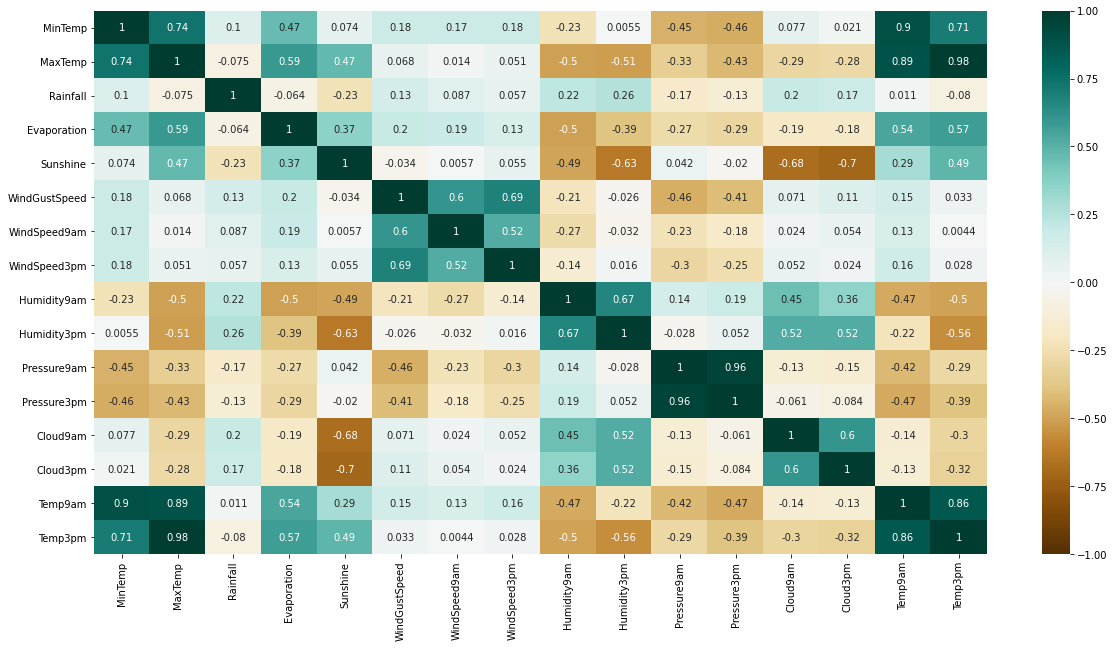

In [8]:
plt.figure(figsize=(20, 10),)

sns.heatmap(data.corr(),vmin=-1, vmax=1,cmap='BrBG',annot=True)

In [9]:
# pairplot = sns.pairplot(data.select_dtypes(include=['float64']))

In [10]:
target = 'RainTomorrow'
features_to_drop = ['RainTomorrow','Date','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']

In [11]:
data_features = data.drop(features_to_drop,axis=1)
target = data[target]

In [12]:
data_features.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday
0,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,8.0,NaN,No
1,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,NaN,NaN,No
2,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,NaN,2.0,No
3,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,NaN,NaN,No
4,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,7.0,8.0,No


In [13]:
target = np.where(target =='Yes',1,0)

In [14]:
target

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_features,target, test_size=0.33, random_state=42)

In [16]:
num_features = data_features.select_dtypes(include='number').columns
cat_features = data_features.select_dtypes(exclude='number').columns

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
                         ('std_scaler', StandardScaler())])

In [18]:
X_train_num = X_train[num_features]

print(X_train_num.shape)
X_train_tr = num_pipeline.fit_transform(X_train_num)
print(X_train_tr.shape)

X_train_tr[0]

(94599, 9)
(94599, 9)


array([-0.27882428, -0.01551908, -0.27408524, -0.11866241,  0.14734138,
       -1.79911995, -1.44084394,  0.15296525,  0.14034904])

In [19]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('oh_enc', OneHotEncoder()),
    ])

In [20]:
# test categorical pipeline
# --------------------------
X_train_cat = X_train[cat_features]
df_cat_tr = cat_pipeline.fit_transform(X_train_cat)

df_cat_tr.toarray()[0,:]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [21]:
from sklearn.compose import ColumnTransformer
full_pipeline = ColumnTransformer([("drop","drop", features_to_drop),
                                   ("num", num_pipeline, num_features),
                                   ("cat", cat_pipeline, cat_features),
                                  ])

In [22]:
data_to_test = load_data(path_to_dataset)
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.33, random_state=42)

In [24]:
X_train_processed = full_pipeline.fit_transform(X_train)
print(X_train_processed.shape)
X_train_processed[0,:].toarray()[0,:]

(94599, 60)


array([-0.27882428, -0.01551908, -0.27408524, -0.11866241,  0.14734138,
       -1.79911995, -1.44084394,  0.15296525,  0.14034904,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ])

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


param_grid = [ {'criterion': ['gini', 'entropy'],
                'splitter': ['best','random'],
                'max_depth': [3,5,6], 'min_samples_leaf': [3, 10, 12, 20]},
             ]

# create instance
tree_cl = DecisionTreeClassifier(random_state=42)

# define scoring function
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score , average='macro')

# search for best solution from combinations using a defined score function
grid_search = GridSearchCV(tree_cl, param_grid, cv=10,
                           scoring=f1,
                           return_train_score=True,
                           verbose=1,n_jobs=-1)

grid_search.fit(X_train_processed, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [3, 5, 6],
                          'min_samples_leaf': [3, 10, 12, 20],
                          'splitter': ['best', 'random']}],
             return_train_score=True,
             scoring=make_scorer(f1_score, average=macro), verbose=1)

In [26]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 3,
 'splitter': 'random'}

In [27]:
best_model = grid_search.best_estimator_
best_model

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=3,
                       random_state=42, splitter='random')

In [28]:
X_test_processed = full_pipeline.fit_transform(X_test)
final_predictions = best_model.predict(X_test_processed)
final_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
classification_pipeline = Pipeline([ ("data_preprocessing", full_pipeline),
                                          ("tree_cl", best_model)])


classification_pipeline.fit(X_train, y_train)
classification_pipeline.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
my_model = classification_pipeline

import joblib
# persist model to file
joblib.dump(classification_pipeline, "juan_elgueta.pkl")

['juan_elgueta.pkl']

In [31]:
classification_model_loaded = joblib.load("juan_elgueta.pkl")

In [32]:
y_pred = classification_model_loaded.predict(X_test)

In [33]:
f1_score(y_test,y_pred)

0.5328623545080781

In [34]:
print(sklearn.metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     36355
           1       0.65      0.45      0.53     10240

    accuracy                           0.83     46595
   macro avg       0.76      0.69      0.71     46595
weighted avg       0.81      0.83      0.81     46595

